#### Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for describing the incidents. Some examples of indicators to be computed are:

- How many males are involved in incidents relative to the total number of males for the same city and in the same period?
- How many injured and killed people have been involved relative to the total injured and killed people in the same congressional district in a given period of time?
- Ratio of the number of killed people in the incidents relative to the number of participants in the incident
- Ratio of unharmed people in the incidents relative to the average of unharmed people in the same period

Note that these examples are not mandatory, and teams can define their own indicators. Each indicator must be correlated with a description and, when necessary, its mathematical formulation. The extracted variables will be useful for the clustering analysis in the second project's task. Once the set of indicators is computed, the team should explore the new features for a statistical analysis, including distributions, outliers, visualizations, and correlations.

For task 1.1 see the corresponding Notebook in [Task 1.1 - Data Understanding](Task1_Data_Understanding.ipynb).

For this task we followed the following check structure: [#WIP]()
1. Data aggregation
2. Reduction of dimensionality
3. Data cleaning
4. Discretization
5. Data transformation
6. Principal Component Analysis via Covariance Matrix
8. Data Similarity via Entropy and proximity coefficients


In [126]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py

# for dataset visibility
pd.set_option('display.max_columns', None)

# Set a seed for reproducibility
np.random.seed(42)

# Load dataset from data understanding
df_incident_du = pd.read_csv('../ds/cleaned/incidents_cleaned.csv', index_col=0)
df_poverty_du = pd.read_csv('../ds/cleaned/poverty_cleaned.csv', index_col = 0)
df_years_state_du = pd.read_csv('../ds/cleaned/year_state_votes_cleaned.csv', index_col = 0)


In [127]:
# Check if dataset loaded correctly
df_incident_du.head()
#df_poverty_du.head()



,state,city_or_county,latitude,longitude,congressional_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year
date,,,,,,,,,,,,,,,,,,,,
2014-01-01,Arkansas,Pine Bluff,34.2291,-91.9779,4,26,Adult 18+,Male,26,26,0,0,0,0,1,0,1,2,Shot - Wounded/Injured,2014
2014-01-01,California,Bakersfield,35.3229,-119.0380,23,28,Adult 18+,Male,28,28,0,0,0,0,2,0,0,2,Shot - Wounded/Injured,2014
2014-01-01,Iowa,Iowa City,41.6611,-91.5302,2,35,Adult 18+,Female,35,35,0,0,2,0,1,0,1,2,other,2014
2014-01-01,New York,Brooklyn,40.6505,-73.9573,9,28,Adult 18+,Male,28,30,0,0,1,0,3,0,0,3,Shot - Wounded/Injured,2014
2014-01-01,Colorado,Grand Junction,39.0496,-108.5250,3,47,Adult 18+,Male,47,47,0,0,0,1,0,0,0,1,"Shot - Dead (murder, accidental, suicide)",2014


# Joining the datasets

We have three dataset: the one with the incidents, one with poverty by state (just two columns) and one with year, state and how much votes each party got. We want to join the three datasets in order to have a single dataset with all the information we need. 

In [128]:
# We need to do merge function from pandas

df_merged = pd.merge(df_incident_du ,df_poverty_du, on=['state', 'year'])

df_merged.head(100)


,state,city_or_county,latitude,longitude,congressional_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year,povertyPercentage
0,Arkansas,Pine Bluff,34.2291,-91.9779,4,26,Adult 18+,Male,26,26,0,0,0,0,1,0,1,2,Shot - Wounded/Injured,2014,16.8
1,Arkansas,Little Rock,34.7314,-92.2590,2,48,Adult 18+,Male,48,48,0,0,0,0,0,0,3,3,other,2014,16.8
2,Arkansas,Little Rock,34.7204,-92.4523,2,60,Adult 18+,Male,60,60,0,0,0,0,1,0,1,2,other,2014,16.8
3,Arkansas,Little Rock,34.7256,-92.3089,2,23,Adult 18+,Female,23,23,0,0,1,0,1,0,1,2,Shot - Wounded/Injured,2014,16.8
4,Arkansas,Leflore,34.5758,-93.1685,4,34,Adult 18+,Male,34,34,0,0,1,0,0,0,2,2,other,2014,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Arkansas,Trumann,35.6775,-90.5129,1,27,Adult 18+,Male,21,27,0,0,0,0,1,0,1,2,Shot - Wounded/Injured,2014,16.8
96,Arkansas,Little Rock,34.6635,-92.3330,2,25,Adult 18+,Male,25,26,0,0,0,0,1,0,3,4,Shot - Wounded/Injured,2014,16.8
97,Arkansas,Little Rock,34.7276,-92.3110,2,26,Adult 18+,Male,26,26,0,0,0,0,1,0,0,1,Shot - Wounded/Injured,2014,16.8
98,Arkansas,Maumelle,34.8600,-92.3959,2,18,Adult 18+,Male,18,18,0,0,0,0,0,0,1,1,other,2014,16.8


# Now merge with the year_state_votes...

In [129]:
df_merged = pd.merge(df_merged, df_years_state_du, on=['state', 'year', 'congressional_district'])

df_merged.head(50) 
#df_merged.info()

,state,city_or_county,latitude,longitude,congressional_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year,povertyPercentage,party,candidatevotes,totalvotes
0,Arkansas,Pine Bluff,34.2291,-91.9779,4,26,Adult 18+,Male,26,26,0,0,0,0,1,0,1,2,Shot - Wounded/Injured,2014,16.8,REPUBLICAN,110789,206131
1,Arkansas,Leflore,34.5758,-93.1685,4,34,Adult 18+,Male,34,34,0,0,1,0,0,0,2,2,other,2014,16.8,REPUBLICAN,110789,206131
2,Arkansas,Texarkana,33.4103,-93.9718,4,20,Adult 18+,Male,20,20,0,0,0,0,2,0,1,3,Shot - Wounded/Injured,2014,16.8,REPUBLICAN,110789,206131
3,Arkansas,Pine Bluff,34.2117,-92.0093,4,37,Adult 18+,Male,21,42,0,0,1,1,2,0,1,4,Shot - Wounded/Injured,2014,16.8,REPUBLICAN,110789,206131
4,Arkansas,Pine Bluff,34.2103,-92.0114,4,21,Adult 18+,Male,21,21,0,0,0,1,0,0,1,2,"Shot - Dead (murder, accidental, suicide)",2014,16.8,REPUBLICAN,110789,206131
5,Arkansas,Pine Bluff,34.2022,-92.0070,4,32,Adult 18+,Male,32,32,0,0,0,0,1,0,1,2,Shot - Wounded/Injured,2014,16.8,REPUBLICAN,110789,206131
6,Arkansas,Pine Bluff,34.2190,-92.0246,4,25,Adult 18+,Male,25,27,0,0,0,0,1,0,1,2,Shot - Wounded/Injured,2014,16.8,REPUBLICAN,110789,206131
7,Arkansas,Pearcy,34.4436,-93.2111,4,20,Adult 18+,Male,20,20,0,0,0,0,0,0,1,1,other,2014,16.8,REPUBLICAN,110789,206131
8,Arkansas,El Dorado,33.1684,-92.8504,4,9,Child 0-11,Male,9,9,1,0,0,1,0,0,0,1,"Shot - Dead (murder, accidental, suicide)",2014,16.8,REPUBLICAN,110789,206131
9,Arkansas,Pine Bluff,34.2340,-92.0278,4,36,Adult 18+,Male,34,36,0,0,0,1,0,0,2,3,"Shot - Dead (murder, accidental, suicide)",2014,16.8,REPUBLICAN,110789,206131


while merging the party results to no be a categorical data anymore, so cast it

In [130]:
#check the values for the column party
valori_unici = df_merged['party'].unique()
print(valori_unici)

['REPUBLICAN' 'DEMOCRAT']


The value 'INDIPENDENT' is not anymore availabe given the fact that during the data cleaning phase for df_years_date there were to many nans rows, so consider 2 categories:

In [131]:
df_merged['party'] = df_merged['party'].astype('category')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64553 entries, 0 to 64552
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   state                      64553 non-null  object  
 1   city_or_county             64553 non-null  object  
 2   latitude                   64553 non-null  float64 
 3   longitude                  64553 non-null  float64 
 4   congressional_district     64553 non-null  int64   
 5   participant_age1           64553 non-null  int64   
 6   participant_age_group1     64553 non-null  object  
 7   participant_gender1        64553 non-null  object  
 8   min_age_participants       64553 non-null  int64   
 9   max_age_participants       64553 non-null  int64   
 10  n_participants_child       64553 non-null  int64   
 11  n_participants_teen        64553 non-null  int64   
 12  n_females                  64553 non-null  int64   
 13  n_killed                   6455

# Do the same for incident charateristics: convert into categorical

In [132]:
#check the values for the column party
valori_unici = df_merged['incident_characteristics1'].unique()
print(valori_unici)
df_merged['incident_characteristics1'] = df_merged['incident_characteristics1'].astype('category')
df_merged.info()

['Shot - Wounded/Injured' 'other'
 'Shot - Dead (murder, accidental, suicide)' 'Shots Fired - No Injuries'
 'Non-Shooting Incident']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64553 entries, 0 to 64552
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   state                      64553 non-null  object  
 1   city_or_county             64553 non-null  object  
 2   latitude                   64553 non-null  float64 
 3   longitude                  64553 non-null  float64 
 4   congressional_district     64553 non-null  int64   
 5   participant_age1           64553 non-null  int64   
 6   participant_age_group1     64553 non-null  object  
 7   participant_gender1        64553 non-null  object  
 8   min_age_participants       64553 non-null  int64   
 9   max_age_participants       64553 non-null  int64   
 10  n_participants_child       64553 non-null  int64   
 11  n_participan

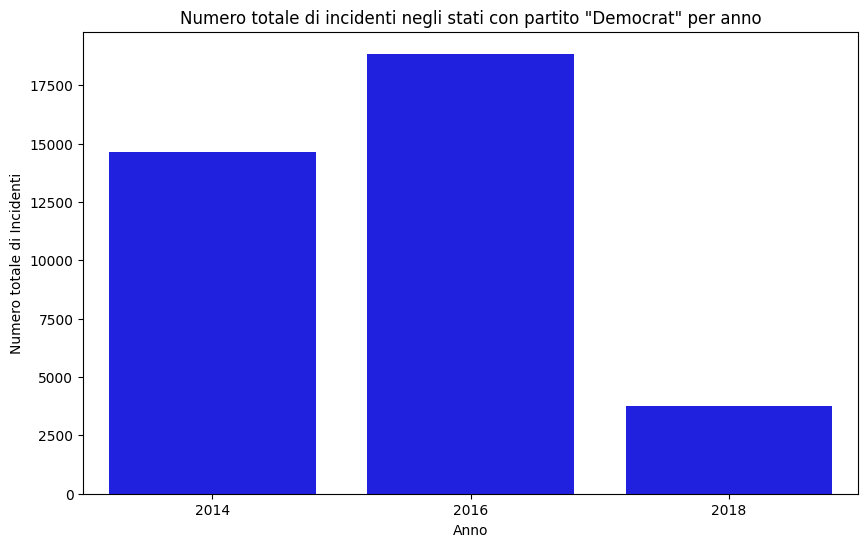

In [133]:
# Filtra i dati solo per il partito "Democrat"
df_democrat = df_merged[df_merged['party'] == 'DEMOCRAT']
# Raggruppa per anno e controlla il numero totale di incidenti
incident_count_by_year = df_democrat.groupby('year').size().reset_index(name='total_incidents')

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='total_incidents', data=incident_count_by_year, color='blue')
plt.title('Numero totale di incidenti negli stati con partito "Democrat" per anno')
plt.xlabel('Anno')
plt.ylabel('Numero totale di Incidenti')
plt.show()

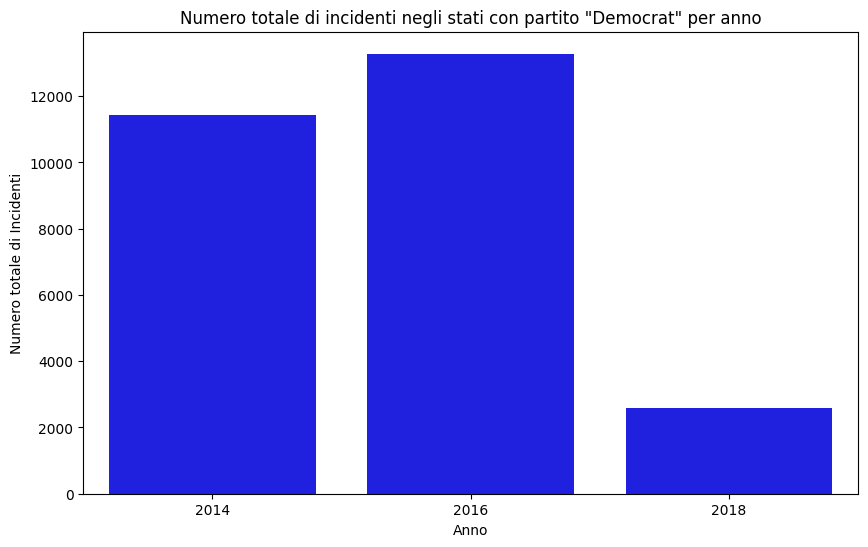

In [134]:
df_republican = df_merged[df_merged['party'] == 'REPUBLICAN']
# Raggruppa per anno e controlla il numero totale di incidenti
incident_count_by_year = df_republican.groupby('year').size().reset_index(name='total_incidents')

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='total_incidents', data=incident_count_by_year, color='blue')
plt.title('Numero totale di incidenti negli stati con partito "Democrat" per anno')
plt.xlabel('Anno')
plt.ylabel('Numero totale di Incidenti')
plt.show()

In [135]:
valori_unic = df_merged['year'].unique()
print(valori_unic)

[2014 2016 2018]



# Idea: Let's try to get number of incidents every 3 months
## Maybe this in data preparation
Since 2018 is the year with less records we could try to visualize what period contains more incidents, let's try to monitor every 3 months: